# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There 1898 rows and 9 columns in the data

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 103.9+ KB


#### Observations:
order_id column is of number (integer) data type
customer_id is of number (integer) data type
restaurant_name is of string data type
cuisine_type string data type 
cost_of_the_order is of number (float) data type
day_of_the_week is of string data type 
rating is of string data type
food_preparation_time is of number (integer) data type
delivery_time is of number (integer) data type


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The minimum time it takes for food to be prepared once an order is placed is 20 minutes.
It takes average of 27 minutes for the food to be prepared once an oreder is placed.
The maximum time it takes for food to be prepared once an order is placed is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [55]:
# Write the code here
order_not_rated = df[df['rating']=='Not given']
len(order_not_rated)

736

#### Observations:
The total number of orders not rated is 736.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

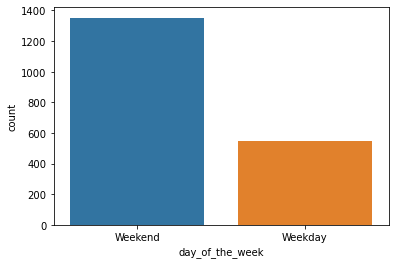

In [188]:
# Write the code here

sns.countplot(x = "day_of_the_week",data=df);

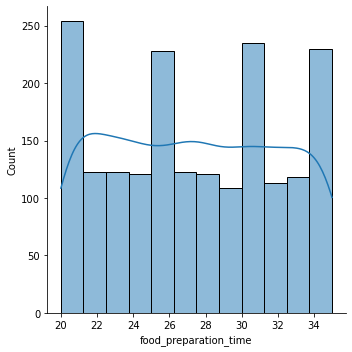

In [189]:
sns.displot(df.food_preparation_time, kde = True);

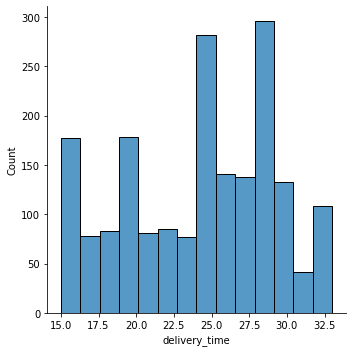

In [209]:
sns.displot(df.delivery_time);

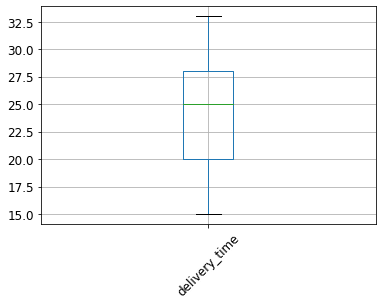

In [80]:
df.boxplot(column = ['delivery_time'], rot =45, fontsize =12);

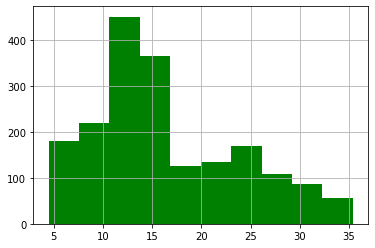

In [192]:
df['cost_of_the_order'].hist(color='g');

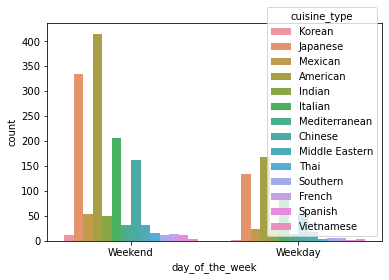

In [199]:
sns.countplot(x='day_of_the_week', hue ='cuisine_type',data=df);

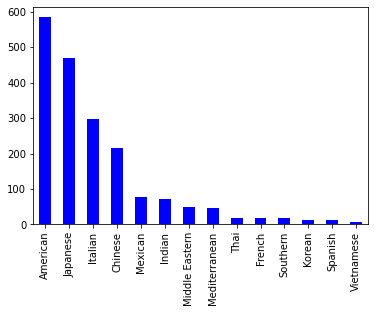

In [208]:
df['cuisine_type'].value_counts().plot.bar(color ='b');

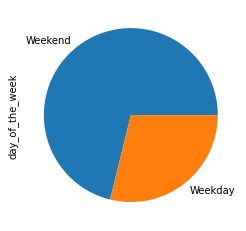

In [204]:
df['day_of_the_week'].value_counts().plot(kind='pie');

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [13]:
# Write the code here
df.groupby('restaurant_name')['order_id'].count().nlargest(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:
The top 5 restaurants in terms of the number of orders received were:

Shake Shack with 219 orders                 
The Meatball Shop with 132 orders         
Blue Ribbon Sushi  with   119 orders
Blue Ribbon Fried Chicken with 96 orders
Parm  with 68 orders                     



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Write the code here
weekend_cuisine = df[df['day_of_the_week']== 'Weekend']
weekend_cuisine.groupby('cuisine_type')['order_id'].count().nlargest(1)

cuisine_type
American    415
Name: order_id, dtype: int64

#### Observations:
The most popular cuisne is American cuisine with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
# Write the code here
df_cost_more_than_20_dollars = df[df['cost_of_the_order']>20]

In [62]:
(df_cost_more_than_20_dollars['cost_of_the_order'].count())/(df['cost_of_the_order'].count())*100

29.24130663856691

#### Observations:
29% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# Write the code here:
df.delivery_time.mean()


24.161749209694417

#### Observations:
The mean order delivery time is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [64]:
# Write the code here
df.groupby('customer_id')['customer_id'].count().nlargest(5)

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
Name: customer_id, dtype: int64

#### Observations:
The 5 most frequent customers and the number of orders they placed are:

customer_id 52832 with   13 orders 
customer_id 47440    with  10 orders
customer_id 83287    with 9 orders
customer_id 250494  with   8 orders
customer_id 65009     with  7 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [185]:
# Write the code here
## Correlation Analysis
correlation_among_numerical_variables = df[['cost_of_the_order','food_preparation_time','delivery_time']].corr()


In [186]:
correlation_among_numerical_variables

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


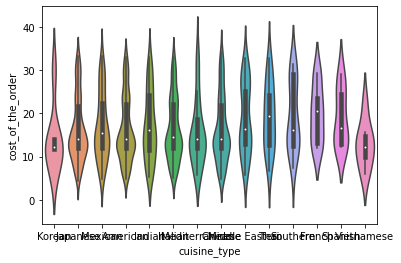

In [162]:
sns.violinplot(x= 'cuisine_type', y= 'cost_of_the_order', data =df);

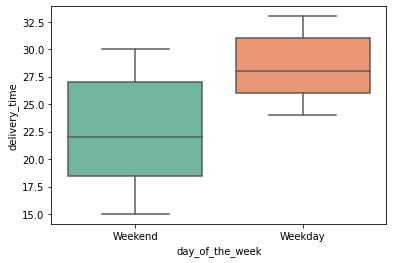

In [177]:
sns.boxplot(x= 'day_of_the_week', y= 'delivery_time', data = df, palette= 'Set2');

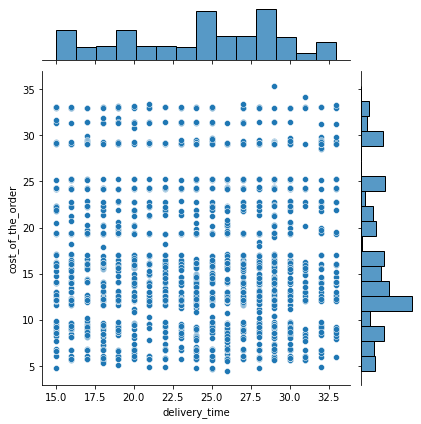

In [180]:
sns.jointplot(x = 'delivery_time',y = 'cost_of_the_order',data =df);

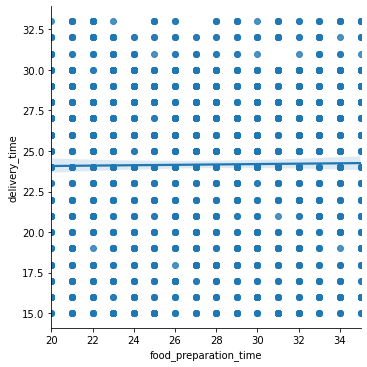

In [184]:
sns.lmplot(x='food_preparation_time', y ='delivery_time', data =df);

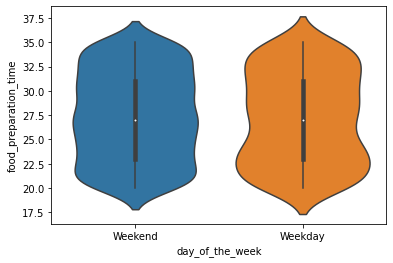

In [207]:
sns.violinplot(x= 'day_of_the_week', y= 'food_preparation_time', data =df);

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [210]:
# Write the code here
df.replace('Not given',0,inplace = True)

In [211]:
df['rating']= df['rating'].astype(float)

In [253]:
#Display all the rows at once
pd.set_option('max_rows',None)

In [250]:
x = df.groupby(by ='restaurant_name').agg({'rating':['count','mean']}).rename(columns= {'count':'rating_count','mean':'average_rating'})

In [252]:
x

rating               
                                      rating_count average_rating
restaurant_name                                                  
'wichcraft                                       1       5.000000
12 Chairs                                        4       2.250000
5 Napkin Burger                                  5       1.600000
67 Burger                                        1       5.000000
Alidoro                                          1       0.000000
Amma                                             4       2.250000
Amy Ruth's                                       3       2.666667
Anjappar Chettinad                               1       5.000000
Asuka Sushi                                      3       3.333333
Aurora                                           2       0.000000
Balade                                           1       5.000000
Balthazar Boulangerie                           10       2.100000
Barbounia                                        6       3.000000
Bareburger                                      27       2.555556
Benihana                                         5       1.800000
Bhatti Indian Grill                              2       2.500000
Big Daddy's                                      2       5.000000
Big Wong Restaurant _¤¾Ñ¼                       1       0.000000
Bistango                                         2       0.000000
Blue Ribbon Brooklyn                             4       2.500000
Blue Ribbon Fried Chicken                       96       2.885417
Blue Ribbon Sushi                              119       2.588235
Blue Ribbon Sushi Bar & Grill                   44       2.295455
Blue Ribbon Sushi Izakaya                       29       2.689655
Boqueria                                         9       2.111111
Bubby's                                          3       3.000000
Bukhara Grill                                    2       5.000000
Burger Joint                                    12       2.833333
Byblos Restaurant                                2       1.500000
Cafe Habana                                     16       2.937500
Cafe Mogador                                    18       3.000000
Cafe de La Esquina                               1       5.000000
Cafeteria                                        9       1.444444
CafÌ© China                                      6       2.666667
Carmine's                                        3       3.333333
Chipotle Mexican Grill $1.99 Delivery           23       2.739130
Cho Dang Gol                                     6       3.833333
Chola Eclectic Indian Cuisine                    1       5.000000
Chote Nawab                                      1       5.000000
Cipriani Le Specialita                           1       5.000000
Coppola's East                                   1       0.000000
Crema Restaurante                                1       0.000000
Delicatessen                                     5       2.600000
DespaÌ±a                                         2       2.500000
Dickson's Farmstand Meats                        3       4.666667
Dig Inn Seasonal Market                          1       5.000000
Dirty Bird To Go (archived)                      3       1.333333
Dirty Bird to Go                                 4       2.000000
Don's Bogam BBQ & Wine Bar                       3       2.333333
Donburi-ya                                       7       2.142857
Dos Caminos                                      8       2.500000
Dos Caminos Soho                                 1       5.000000
DuMont Burger                                    3       2.666667
El Parador Cafe                                  2       2.500000
Empanada Mama (closed)                          13       3.000000
Emporio                                          1       0.000000
Five Guys Burgers and Fries                     29       2.827586
Five Leaves                                      4       2.250000
Frank Restaurant  

#### Observations:
Though some companies garnered more than 50 ratings, and some company had an average rating of above 4, none of the restaurants met the criteria to get promotion offer from the company. 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [141]:
# Write the code here
df_cost_more_than_20_dollars = df[df['cost_of_the_order']>20]
df_cost_more_than_5_dollars = df[df['cost_of_the_order']>5]

In [151]:
x = sum(df_cost_more_than_20_dollars['cost_of_the_order']*0.25)

In [152]:
y = sum(df_cost_more_than_15_dollars['cost_of_the_order']*0.15)

In [148]:
y.sum()

3066.9495

In [153]:
z = x+y

In [154]:
z

6755.677

#### Observations:
The net revenue genrated by the company across all orders is 6,755.68 Dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [119]:
# Write the code here
df['total_time_required_for_delivery'] = df['food_preparation_time'] + df['delivery_time']



In [130]:
df_total_time_required_for_delivery_above_60_mins = df[df['total_time_required_for_delivery']>60]

In [133]:
len(df_total_time_required_for_delivery_above_60_mins['total_time_required_for_delivery'])/len(df['total_time_required_for_delivery'])*100

10.537407797681771

#### Observations:
11% of the orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [106]:
# Write the code here
Weekdays_df = df[df['day_of_the_week']=='Weekday']
Weekends_df = df[df['day_of_the_week']=='Weekend']

In [102]:
weekdays_delivery_time_mean  = Weekdays_df['delivery_time'].mean()
weekends_delivery_time_mean  = Weekends_df['delivery_time'].mean()

In [103]:
weekdays_delivery_time_mean

28.340036563071298

In [104]:
weekends_delivery_time_mean

22.4700222057735

#### Observations:
The average delivery time on weekdays is 28 minutes, while the averag delivery time on weekends is 22 minutes
The mean delivery time during weekdays is much higher than that of weekends

### Conclusion and Recommendations
The conclusion is that deliveries are made faster on weekends than on  weekdays. 
The business should improve on its weekdays delivery time so that it will trigger more customers to make orders on week days.

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* American Cuisine is the most popular cuisine. This means more people prefer American cuisine than other cuisine types
* The average delivery time on weekdays is much slower than on weekends.
* Though, the percent of  orders that take more than 60 minutes to get delivered from the time the order is placed is low, it can be improved upon further.
* The net revenue  that can be generated by the company is proportional to the number of orders made
* American cuisine is seconded by Japanese cuisine. This means the company also has a large market for Japanese cuisine

### Recommendations:

* The business should consider making more American, since it has more popularity than the rest of the cuisines.
*  The business should target customers who are likely to order the other cuisine types. This will help increase the orders place for such other cuisine types.
* The company should embark on promotional strategies that will boost orders made by customers and consequently enables it generate more revenue.
* There are more orders on weekends than on weekdays. The company should target more customers on weekdays also.
* The delivery time during weekends should be should be improved upon.
* The company should reward customers who made orders frequently. This will encourage other customers to patronise the company more often. With this, the company can boost its revenue.

---